In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.data_generator import generate_data
from src.clustering import OrdinalClustering, univariate_em, compute_loglikelihood, compute_p_list

%load_ext autoreload
%autoreload 2

## BOS Distribution

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
True mu: 4, True pi: 0.9979022379876543


100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

Estimated mu: 4, Estimated pi: 0.5646375023808744


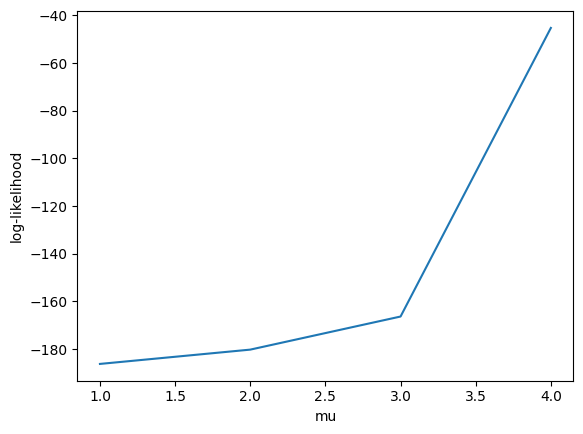

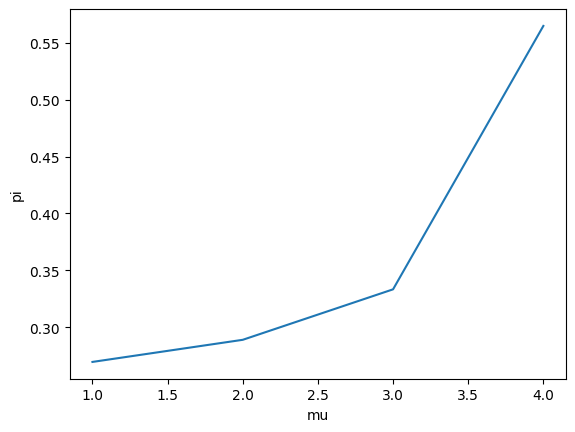

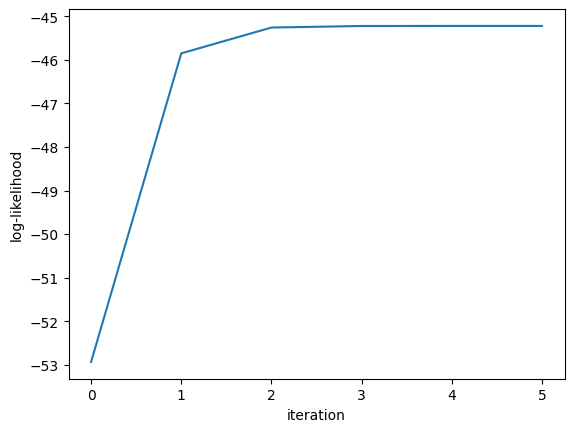

In [2]:
#Univariate
n = 100
m = 4
n_iter = 100
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()
# true_mu = 3
# true_pi = 0.6971416168283547

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

all_lls = []
ll_list = []
pi_list = []
mu_list = list(range(1, m + 1))
for mu in tqdm(mu_list):
    pl, lls, p_tots = univariate_em(data, m, mu, n_iter, eps)
    pi_list.append(pl[-1])
    ll_list.append(compute_loglikelihood(data, p_tots))
    all_lls.append(lls)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_list[np.argmax(ll_list)], pi_list[np.argmax(ll_list)]
    )
)

plt.plot(mu_list, ll_list)
plt.xlabel("mu")
plt.ylabel("log-likelihood")
plt.figure()
plt.plot(mu_list, pi_list)
plt.xlabel("mu")
plt.ylabel("pi")
plt.show()

plt.plot(all_lls[np.argmax(ll_list)])
plt.xlabel("iteration")
plt.ylabel("log-likelihood")
plt.show()


True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[1 2 2]
 [2 2 1]
 [2 1 1]], True pi: [[0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936]
 [0.78052918 0.11827443 0.63992102]]
Iteration 0
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Current pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Log-likelihood: -362.4347830623027

Iteration 1
--------------------
Current mu: [[1 2 2]
 [2 2 3]
 [2 2 1]]
Current pi: [[0.57909868 0.57092463 0.42311768]
 [0.62810695 0.55205265 0.43357443]
 [0.36733524 0.29972575 0.45736654]]
Log-likelihood: -268.7072681064906

Iteration 2
--------------------
Current mu: [[1 2 2]
 [2 2 3]
 [2 2 1]]
Current pi: [[0.58733376 0.57540851 0.60362709]
 [0.63277377 0.52719855 0.39444696]
 [0.58245537 0.49675185 0.52710051]]
Log-likelihood: -253.50435424406626

Converged, stopping...
Estimated alpha: [0.39268139 0.10075762 0.50656099], Estimated mu: [[1 2 2]
 [2 2 

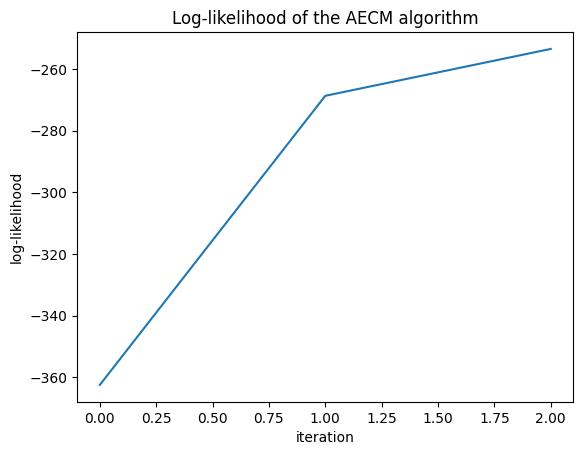

In [6]:
# Multivariate
n = 100
d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.3333333333333333
Estimated alpha: 0.3926813852620377
True mu: [1 2 2]
Estimated mu: [1 2 2]
True pi: [0.83261985 0.77815675 0.87001215]
Estimated pi: [0.59103909 0.55828565 0.62065775]
Cluster 1
True alpha: 0.3333333333333333
Estimated alpha: 0.10075762235307004
True mu: [2 2 1]
Estimated mu: [2 2 3]
True pi: [0.97861834 0.79915856 0.46147936]
Estimated pi: [0.63706018 0.482909   0.42395296]
Cluster 2
True alpha: 0.3333333333333333
Estimated alpha: 0.5065609923848923
True mu: [2 1 1]
Estimated mu: [2 2 1]
True pi: [0.78052918 0.11827443 0.63992102]
Estimated pi: [0.62633314 0.5154502  0.5444961 ]


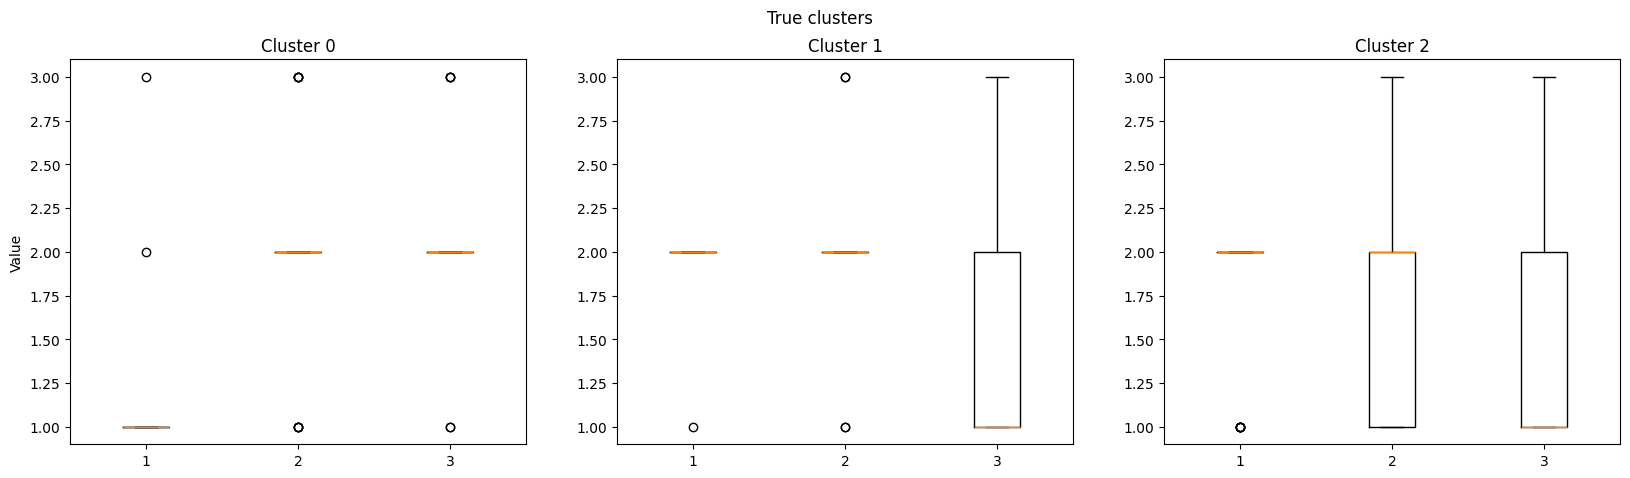

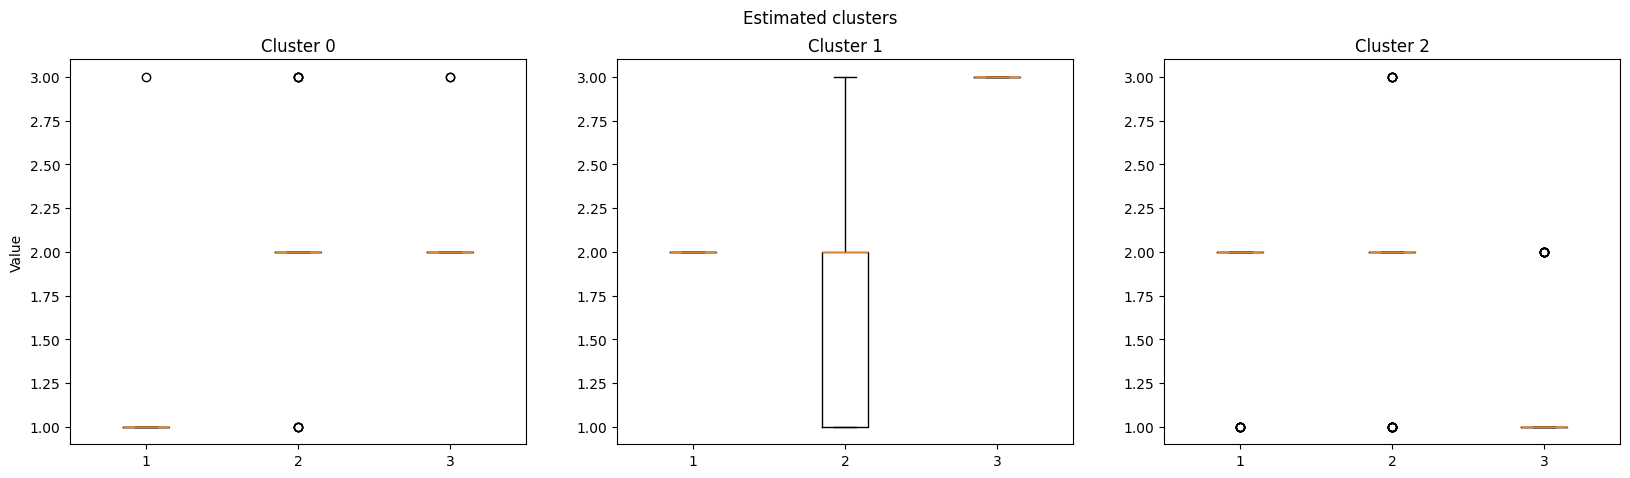

In [7]:
import pandas as pd

#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [8]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [50, 250]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                m = np.ones(dim).astype(int) * ncats
                np.random.seed(0)
                true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                true_pi = np.random.random((nc, dim))
                true_alpha = np.random.random(nc)
                true_alpha = true_alpha / np.sum(true_alpha)

                data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0)

                clustering = OrdinalClustering(nc, n_iter=n_iter, eps=eps)

                alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                labels = clustering.labels_
                ot_matching = optimal_transport_matching(labels, data[1], nc)

                alpha_hat = alpha_hat[list(ot_matching.values())]
                mu_hat = mu_hat[list(ot_matching.values()), :]
                pi_hat = pi_hat[list(ot_matching.values()), :]

                delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                scores["n"].append(n)
                scores["n_clusters"].append(nc)
                scores["d"].append(dim)
                scores["n_cats"].append(ncats)
                scores["ll"].append(ll_list[-1])
                scores["pi"].append(pi_hat)
                scores["mu"].append(mu_hat)
                scores["alpha"].append(alpha_hat)
                scores["delta_alpha"].append(delta_alpha)
                scores["delta_mu"].append(delta_mu)
                scores["delta_pi"].append(delta_pi)

scores = pd.DataFrame(scores)
scores.to_csv("./data/scores.csv", index=False)


# exporting to latex:


In [ ]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results", escape=False,
                            position="htbp",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[htbp]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters orders.}
\label{tab:results}
\begin{tabular}{llllrrr}
\toprule
 &  &  &  & \Delta \alpha & \Delta \mu & \Delta \pi \\
n & n_{clusters} & d & n_{cats} &  &  &  \\
\midrule
\multirow[t]{8}{*}{100} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.097 & 0.000 & 0.036 \\
 &  &  & 3 & 0.111 & 0.222 & 0.106 \\
\cline{3-7}
 &  & \multirow[t]{2}{*}{5} & 2 & 0.034 & 0.000 & 0.041 \\
 &  &  & 3 & 0.041 & 0.133 & 0.066 \\
\cline{2-7} \cline{3-7}
 & \multirow[t]{4}{*}{5} & \multirow[t]{2}{*}{3} & 2 & 0.039 & 0.167 & 0.060 \\
 &  &  & 3 & 0.094 & 0.000 & 0.185 \\
\cline{3-7}
 &

\Delta \alpha  \Delta \mu  \Delta \pi
n   n_{clusters} d n_{cats}                                       
100 3            3 2              0.096805    0.000000    0.035627
                   3              0.111058    0.222222    0.105618
                 5 2              0.033683    0.000000    0.041117
                   3              0.040667    0.133333    0.066267
    5            3 2              0.038909    0.166667    0.060221
                   3              0.093702    0.000000    0.184998
                 5 2              0.059265    0.100000    0.085619
                   3              0.035969    0.066667    0.086575